In [1]:
%pip install git+https://gitlab.com/moskalenkoviktor/ml_validation -q

Note: you may need to restart the kernel to use updated packages.


In [2]:
import locale

import numpy as np
import numpy.typing as npt

from ml_validation import database
from ml_validation.experiment import Report, ptbxl
from ml_validation.filters import make_filter
from ml_validation.plotter import plot_ecg

In [3]:
locale.setlocale(locale.LC_ALL, "")
path_dataset = "datasets"
task_type = "superclasses"
sample_rate = 500

In [4]:
# Скачиваем базу PTB-XL
database.download(database.Type.PTB_XL, path_dataset)

Archive already exists: datasets/ptb_xl.zip


In [5]:
# Начинаем эксперимент
experiment = ptbxl.start_experiment(
    name="DummyUniform",
    description="Вероятность каждого класса 50%",
    authors="Moskalenko Viktor",
    path_dir=path_dataset,
    task_type=task_type,
)

In [6]:
# Создаём фильтр
filtration = make_filter(sample_rate)

In [7]:
# Получаем данные для обучения
X, Y = experiment.get_data()
signal = X[0, 0].copy()

# Фильтруем данные
filtration(X, inplace=True)
filtered = X[0, 0]

X.shape, Y.shape

((19601, 12, 5000), (19601, 5))

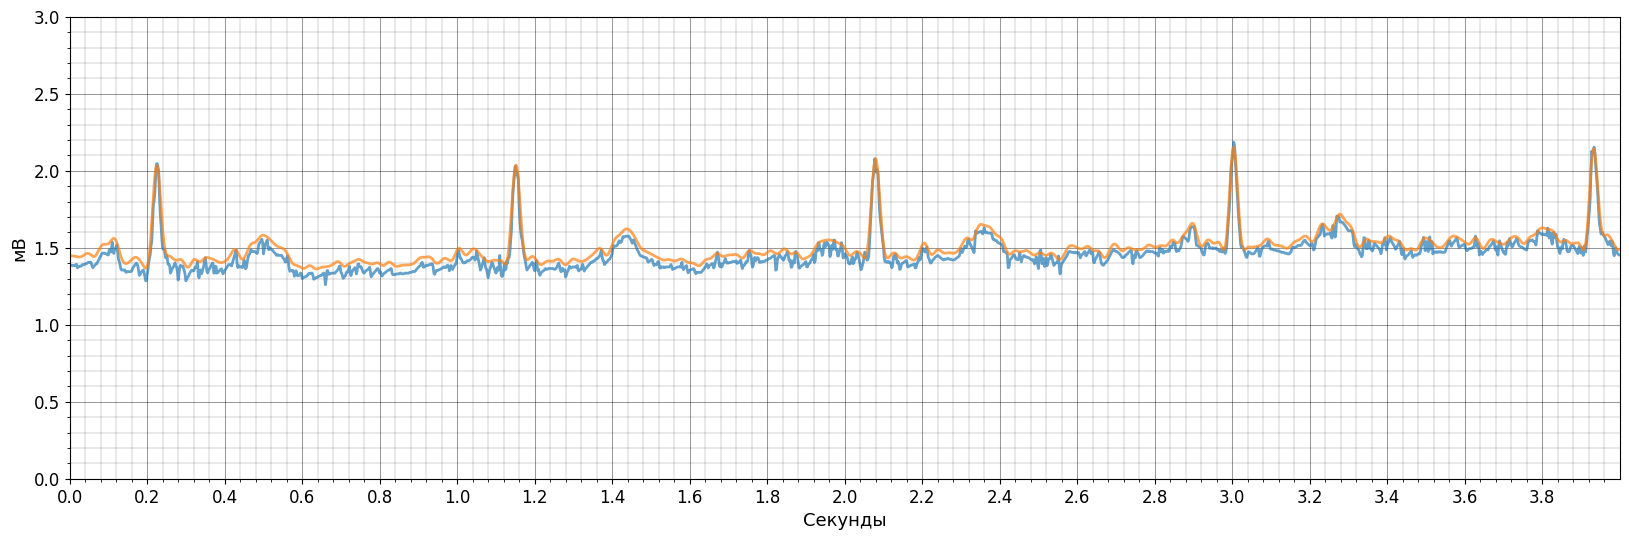

In [8]:
# Визуализируем оригинальный сигнал и фильтрованный
plot_ecg(np.array([signal[:2000], filtered[:2000]]), distance=0, colors=["#1f77b4b0", "#ff7f0eb0"])

In [9]:
class MyAlgorithm:
    # Реализуем алгоритм диагностики

    def __init__(self) -> None:
        self._rs = np.random.RandomState(42)

    def __call__(self, X_test: npt.NDArray[np.float32]) -> npt.NDArray[np.bool_]:
        X_test = filtration(X_test)
        return self._rs.rand(len(X_test), Y.shape[1]) > 0.5

In [10]:
# Считаем метрики
report = experiment.validate(MyAlgorithm(), batch_size=128)

In [11]:
report.metrics

,NORM,MI,STTC,CD,HYP,micro avg,macro avg,weighted avg,samples avg
precision,0.446009,0.236364,0.248168,0.235133,0.125232,0.257553,0.258181,0.300229,0.248863
recall,0.493250,0.472727,0.520154,0.518145,0.515267,0.500716,0.503909,0.500716,0.493706
f1-score,0.468442,0.315152,0.336020,0.323474,0.201493,0.340146,0.328916,0.362730,0.306803
support,963.000000,550.000000,521.000000,496.000000,262.000000,2792.000000,2792.000000,2792.000000,2792.000000


In [12]:
report.print_matrices()

+---------+---------+---------+---------+---------+
| NORM    | MI      | STTC    | CD      | HYP     |
+=========+=========+=========+=========+=========+
| 645 590 | 808 840 | 856 821 | 866 836 | 993 943 |
| 488 475 | 290 260 | 250 271 | 239 257 | 127 135 |
+---------+---------+---------+---------+---------+



In [13]:
report.dump("__out.json")

In [14]:
print(Report.load("__out.json"))

Версия: 0.1.1
Начало: Сб 24 авг 2024 17:41:09 UTC+03:00
Конец: Сб 24 авг 2024 17:42:32 UTC+03:00
Название: DummyUniform
Описание: Вероятность каждого класса 50%
Ссылка: 
Автор: Moskalenko Viktor

Метрики:
              NORM       MI     STTC       CD      HYP  micro avg  macro avg  \
precision 0.446009 0.236364 0.248168 0.235133 0.125232   0.257553   0.258181   
recall     0.49325 0.472727 0.520154 0.518145 0.515267   0.500716   0.503909   
f1-score  0.468442 0.315152  0.33602 0.323474 0.201493   0.340146   0.328916   
support      963.0    550.0    521.0    496.0    262.0     2792.0     2792.0   

           weighted avg  samples avg  
precision      0.300229     0.248863  
recall         0.500716     0.493706  
f1-score        0.36273     0.306803  
support          2792.0       2792.0  

Матрицы рассогласования:

+---------+---------+---------+---------+---------+
| NORM    | MI      | STTC    | CD      | HYP     |
+=========+=========+=========+=========+=========+
| 645 590 | 808 